# Pymaceuticals Inc.
---

### Analysis

- Based on the data below, it shows there are more male mice in the study, and it seems as though there is a correlation to the weight and tumor volume. The heavier a mouse is the higher their tumor volume is. 
 

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_combined = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
mouse_study_combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count = len(pd.unique(mouse_study_combined['Mouse ID']))
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study_combined[mouse_study_combined.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = duplicate_mice[duplicate_mice['Mouse ID'].isin(duplicate_mice['Mouse ID'])]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mouse_study_combined.drop_duplicates(subset=['Mouse ID'])
clean_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = len(pd.unique(clean_mouse_data['Mouse ID']))
clean_mouse_count

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_vol = mouse_study_combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor_vol = mouse_study_combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_vol_var = mouse_study_combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_vol_stdev = mouse_study_combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_sem = mouse_study_combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
mice_summary = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_vol,
    "Median Tumor Volume": median_tumor_vol,
    "Tumor Volume Variance": tumor_vol_var, 
    "Tumor Volume Std. Dev.": tumor_vol_stdev,
    "Tumor Volume Std. Err.": tumor_sem
})


mice_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

reg_group = mouse_study_combined.groupby('Drug Regimen')

mice_sum_agg_stats = reg_group['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

mice_sum_agg_stats = mice_sum_agg_stats.rename(columns={
    'mean': "Mean Tumor Volume",
    'median': "Median Tumor Volume",
    'var': "Tumor Volume Variance",
    'std': "Tumor Volume Std. Dev.",
    'sem': "Tumor Volume Std. Err."
})

mice_sum_agg_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

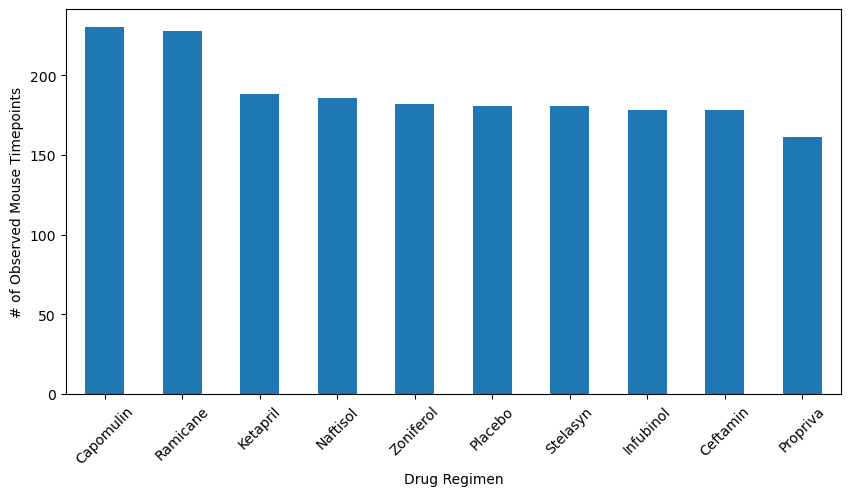

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
reg_counts = mouse_study_combined['Drug Regimen'].value_counts()

reg_counts.plot(kind='bar', figsize=(10,5))
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)

plt.show()



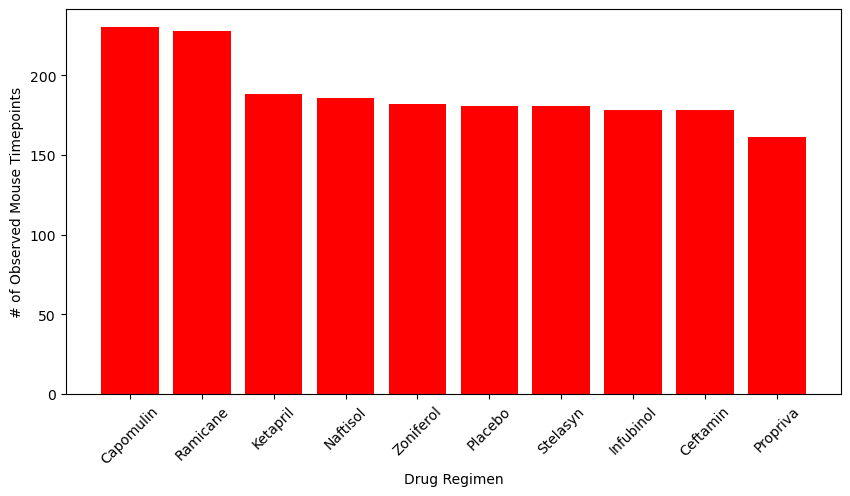

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

reg_counts = mouse_study_combined['Drug Regimen'].value_counts()

reg_names = reg_counts.index
reg_values = reg_counts.values

plt.figure(figsize=(10,5))
plt.bar(reg_names, reg_values, color='red')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)

plt.show()

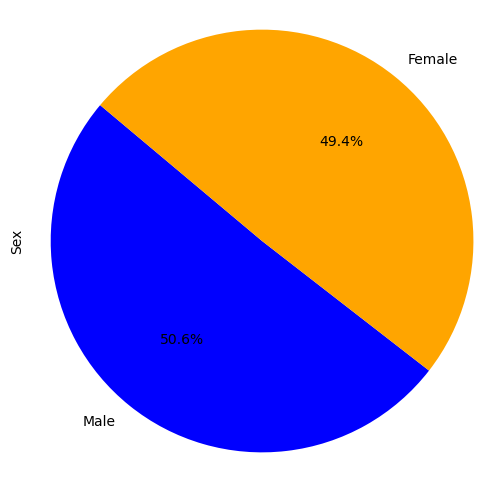

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = mouse_study_combined['Sex'].value_counts()
colors = ['blue', 'orange']

gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=colors, figsize=(6,6))

plt.ylabel('Sex')
plt.axis('equal')

plt.show()

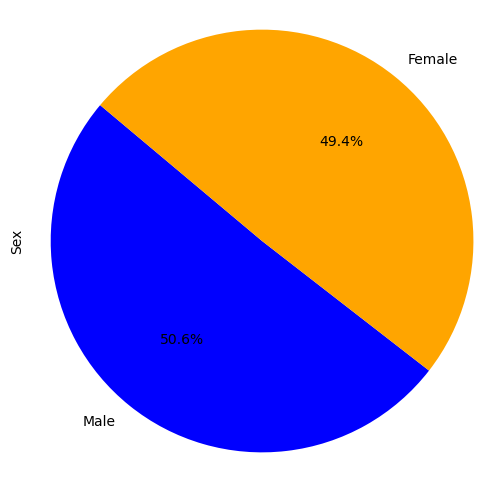

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = mouse_study_combined['Sex'].value_counts()
colors = ['blue', 'orange']

plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)

plt.ylabel('Sex')
plt.axis('equal')

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = mouse_study_combined.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol = pd.merge(last_timepoints, mouse_study_combined, on=['Mouse ID', 'Timepoint'], how='inner')
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_vol = final_tumor_vol[final_tumor_vol['Drug Regimen'].isin(treatment_regimens)]

final_tumor_vol

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
239,y769,45,Ceftamin,Female,6,27,68.594745,4
240,y793,45,Capomulin,Male,17,17,31.896238,2
241,y865,45,Ceftamin,Male,23,26,64.729837,3
245,z578,45,Ramicane,Male,11,16,30.638696,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.  
    # Locate the rows which contain mice on each drug and get the tumor volume
    # add subset
    # Determine outliers using upper and lower bounds
    
iqr_values = []
outliers = []

for regimen in treatment_regimens:
    
    regimen_data = final_tumor_vol[final_tumor_vol['Drug Regimen'] == regimen]
    tumor_volumes = regimen_data['Tumor Volume (mm3)']
    
    quartiles = tumor_volumes.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    iqr_values.append(iqr)

    lower_bound = lower_quartile - (1.5*iqr)
    upper_bound = upper_quartile + (1.5*iqr)
    
    potential_outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    outliers.append(potential_outliers)
    
    print(f"Regimen: {regimen}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential Outliers: {potential_outliers}")
    
outliers_df = pd.DataFrame({
    "Regimen": treatment_regimens, 
    "IQR": iqr_values, 
    "Lower Bound": [lower_quartile - (1.5*iqr)for iqr, lower_quartile in zip(iqr_values, final_tumor_vol.groupby('Drug Regimen')['Tumor Volume (mm3)'].quantile(0.25))],
    "Upper Bound": [upper_quartile + (1.5 * iqr) for iqr, upper_quartile in zip(iqr_values, final_tumor_vol.groupby('Drug Regimen')['Tumor Volume (mm3)'].quantile(0.75))],
    "Potential Outliers": outliers
})

print(outliers_df)

Regimen: Capomulin
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Regimen: Ramicane
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Regimen: Infubinol
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Regimen: Ceftamin
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
     Regimen        IQR  Lower Bound  Upper Bound  \
0  Capomulin   7.781863    20.704562    51.832015   
1   Ramicane   9.098537    35.074273    77.947635   
2  Infubinol  11.477135    36.832905    82.741446   
3   Ceftamin  15.577752     8.193841    64.025635   

                                

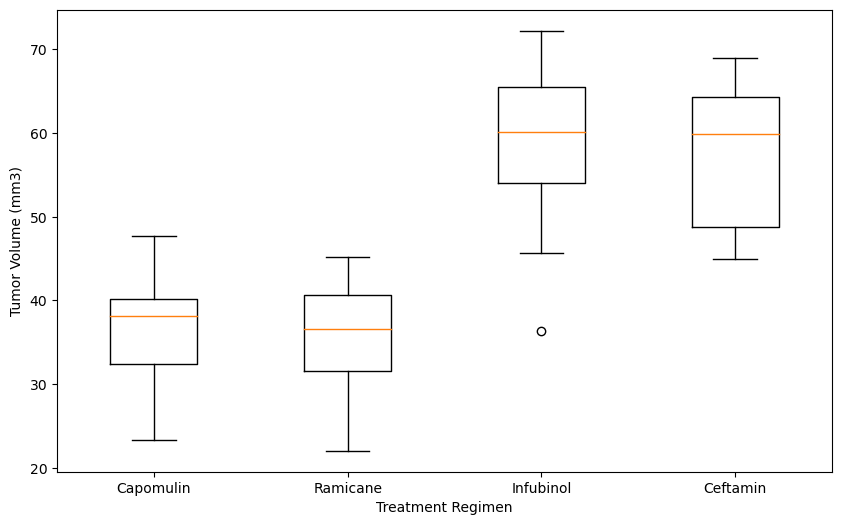

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_vol_data = {}

for regimen in treatment_regimens:
    regimen_data = final_tumor_vol[final_tumor_vol['Drug Regimen'] == regimen]
    
    tumor_vol = regimen_data['Tumor Volume (mm3)']
    
    tumor_vol_data[regimen] = tumor_vol
    
data_plot = [tumor_vol_data[regimen] for regimen in treatment_regimens]

plt.figure(figsize=(10,6))
plt.boxplot(data_plot, labels= treatment_regimens)
plt.xlabel("Treatment Regimen")
plt.ylabel("Tumor Volume (mm3)")

plt.show()    


## Line and Scatter Plots

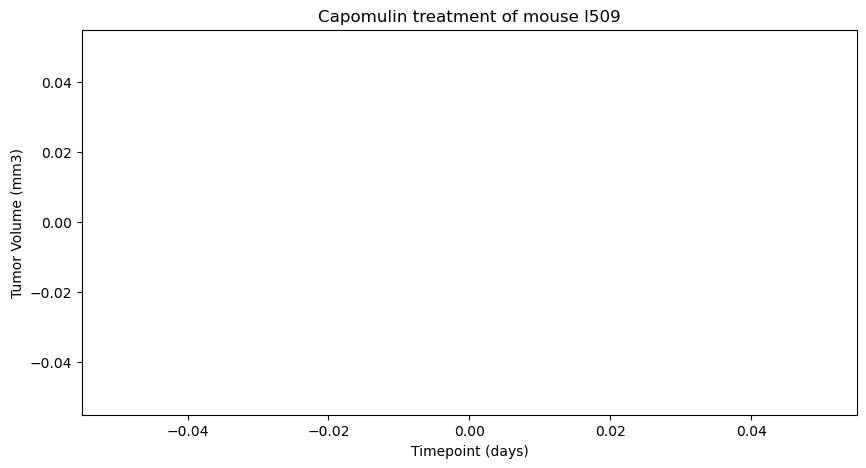

In [47]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse = 'Mouse ID'
select_mouse_data = final_tumor_vol[(final_tumor_vol['Mouse ID'] ==capomulin_mouse) & 
                                     (final_tumor_vol['Drug Regimen'] == 'Capomulin')]

capomulin_data = select_mouse_data[select_mouse_data['Drug Regimen'] == 'Capomulin']

timepoints = select_mouse_data['Timepoint']
tumor_volumes = select_mouse_data['Tumor Volume (mm3)']


plt.figure(figsize=(10,5))
plt.plot(timepoints, tumor_volumes, marker='o', color='blue', linestyle='-', linewidth=0)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(False)

plt.show()

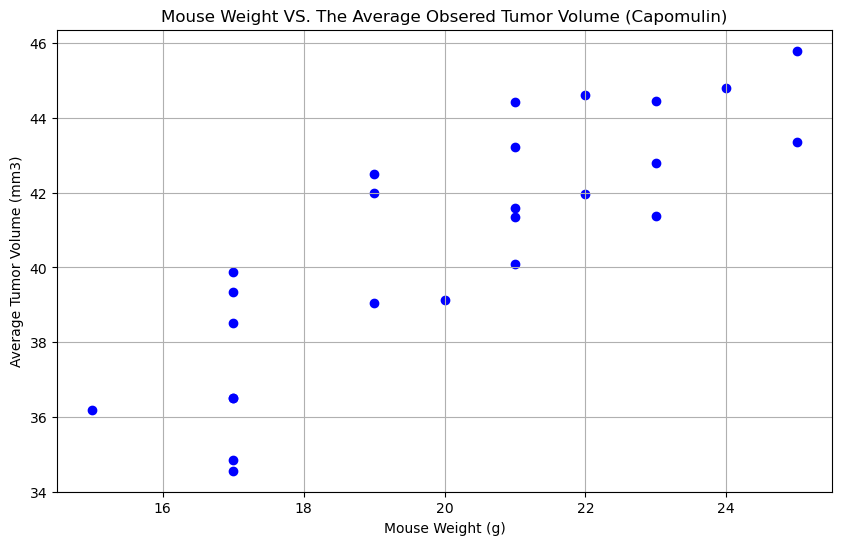

In [36]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = mouse_study_combined[mouse_study_combined['Drug Regimen'] == 'Capomulin']
average_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights= capomulin_data.groupby('Mouse ID')['Weight (g)'].first()

plt.figure(figsize=(10,6))
plt.scatter(mouse_weights, average_tumor_vol, marker='o', color='blue')
plt.title('Mouse Weight VS. The Average Obsered Tumor Volume (Capomulin)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)

plt.show()

## Correlation and Regression

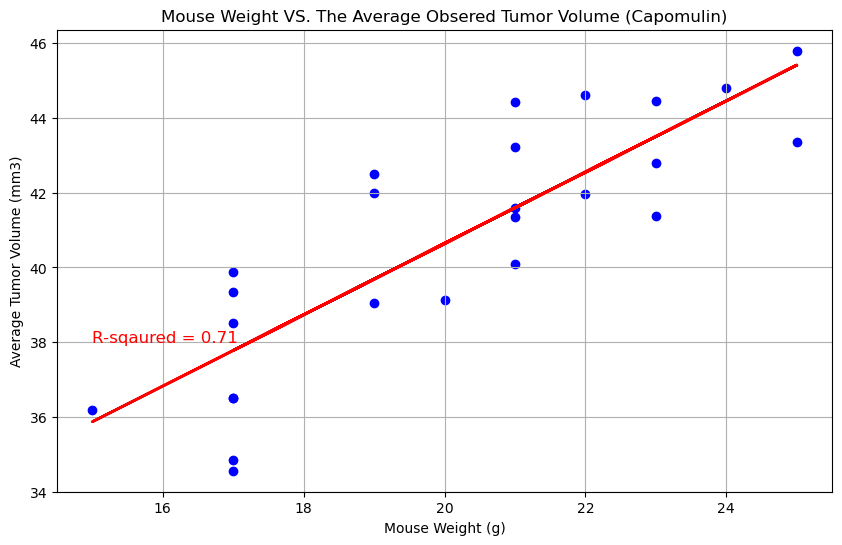

Correlation Coefficient: 0.84


In [42]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = mouse_study_combined[mouse_study_combined['Drug Regimen'] == 'Capomulin']
average_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights= capomulin_data.groupby('Mouse ID')['Weight (g)'].first()
correlation_coefficient = average_tumor_vol.corr(mouse_weights)

plt.figure(figsize=(10,6))
plt.scatter(mouse_weights, average_tumor_vol, marker='o', color='blue')
plt.title('Mouse Weight VS. The Average Obsered Tumor Volume (Capomulin)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)

slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weights, average_tumor_vol)
regression_line = slope * mouse_weights + intercept

plt.plot(mouse_weights, regression_line, color='red', linestyle='-', linewidth=2)
plt.annotate(f"R-sqaured = {r_value**2:.2f}", (15,38), fontsize=12, color='red')

plt.show()

print(f"Correlation Coefficient: {correlation_coefficient:.2f}")